In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import windrose
from windrose import WindroseAxes
import natsort
import matplotlib.cm as cm

In [5]:
os.chdir(r"C:\Users\olivi\Desktop\miniconda\mit-whoi\PamlicoWind")

2011


In [49]:
def combWindData(filepath):
    column_names = ["dt", "wspd", "wdir"]
    df = []

    for root, dirnames, filenames in os.walk(filepath):
            for filename in natsort.natsorted(filenames):
                file = os.path.join(root, filename)

                data = pd.read_csv(file, delim_whitespace=True, header=0, low_memory=False)
                data1 = data.drop([0])
                data1['WDIR']=pd.to_numeric(data1['WDIR'])
                data2 = data1.loc[((data1['WDIR']<=360)&(data1['WDIR']>=0))]
                date = data2['#YY'].astype(str)+'/'+data2['MM'].astype(str)+'/'+data2['DD'].astype(str)
                time = data2['hh'].astype(str)+':'+data2['mm'].astype(str)+':'+'00'
                wind_sp = np.array(data2['WSPD'])
                wind_dir = np.array(data2['WDIR'])
                wind_df = pd.DataFrame({'date':date,'time':time,'wspd':wind_sp, 'wdir':wind_dir})
                wind_df['dt'] = pd.to_datetime(wind_df['date']+' '+wind_df['time'])
                wind_df['wspd'] = pd.to_numeric(wind_df['wspd'])
                wind_df['wdir'] = pd.to_numeric(wind_df['wdir'])
                wind_df = wind_df.set_index('dt')
                wind_rs = wind_df.resample('H').mean()
                df.append(wind_rs)    
            appended_data = pd.concat(df)    

    return appended_data

In [50]:
appended_data = combWindData(r'C:\Users\olivi\Desktop\miniconda\mit-whoi\PamlicoWind\files')
print('done')

done


In [52]:
appended_data.to_csv("combined_PamlicoWind.csv")

In [5]:
os.chdir(r"C:\Users\olivi\Desktop\miniconda\mit-whoi\PamlicoWind")
df = pd.read_csv("combined_PamlicoWind.csv")
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
print(df.dtypes)
df

wspd    float64
wdir    float64
dtype: object


,wspd,wdir
dt,,
2010-08-19 20:00:00,2.90,258.0
2010-08-19 21:00:00,3.92,255.3
2010-08-19 22:00:00,3.11,229.7
2010-08-19 23:00:00,3.57,223.7
2010-08-20 00:00:00,3.05,224.3
...,...,...
2020-12-31 19:00:00,2.85,196.0
2020-12-31 20:00:00,2.86,197.2
2020-12-31 21:00:00,2.58,194.1


In [6]:
df['month'] = pd.DatetimeIndex(df.index).month
df

,wspd,wdir,month
dt,,,
2010-08-19 20:00:00,2.90,258.0,8
2010-08-19 21:00:00,3.92,255.3,8
2010-08-19 22:00:00,3.11,229.7,8
2010-08-19 23:00:00,3.57,223.7,8
2010-08-20 00:00:00,3.05,224.3,8
...,...,...,...
2020-12-31 19:00:00,2.85,196.0,12
2020-12-31 20:00:00,2.86,197.2,12
2020-12-31 21:00:00,2.58,194.1,12


In [7]:
df_jan = df.loc[(df['month']==1)]
df_jan.to_csv("jan_pamilco.csv")

df_feb = df.loc[(df['month']==2)]
df_feb.to_csv("fev_pamilco.csv")

df_mar = df.loc[(df['month']==3)]
df_mar.to_csv("mar_pamilco.csv")

df_apr = df.loc[(df['month']==4)]
df_apr.to_csv("apr_pamilco.csv")

df_may = df.loc[(df['month']==5)]
df_may.to_csv("may_pamilco.csv")

df_jun = df.loc[(df['month']==6)]
df_jun.to_csv("jun_pamilco.csv")

df_jul = df.loc[(df['month']==7)]
df_jul.to_csv("jul_pamilco.csv")

df_aug = df.loc[(df['month']==8)]
df_aug.to_csv("aug_pamilco.csv")

df_sep = df.loc[(df['month']==9)]
df_sep.to_csv("sep_pamilco.csv")

df_octo = df.loc[(df['month']==10)]
df_octo.to_csv("octo_pamilco.csv")

df_nov = df.loc[(df['month']==11)]
df_nov.to_csv("nov_pamilco.csv")

df_dec = df.loc[(df['month']==12)]
df_dec.to_csv("dec_pamilco.csv")

In [8]:
df_NDJ = df.loc[((df['month']==1)|(df['month']==11)|(df['month']==12))]
df_NDJ.to_csv("NovDecJan_pamilco.csv")

df_NDJF = df.loc[((df['month']==1)|(df['month']==2)|(df['month']==11)|(df['month']==12))]
df_NDJF.to_csv("NovDecJanFeb_pamilco.csv")

df_SOND = df.loc[((df['month']==9)|(df['month']==10)|(df['month']==11)|(df['month']==12))]
df_SOND.to_csv("SepOctNovDec_pamilco.csv")

In [9]:
os.chdir(r"C:\Users\olivi\Desktop\miniconda\mit-whoi\PamlicoWind")
df = pd.read_csv("NovDecJanFeb_pamilco.csv")
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
print(df.dtypes)
df

wspd     float64
wdir     float64
month      int64
dtype: object


,wspd,wdir,month
dt,,,
2010-11-01 00:00:00,1.130000,272.200000,11
2010-11-01 01:00:00,2.350000,251.200000,11
2010-11-01 02:00:00,2.411111,309.777778,11
2010-11-01 03:00:00,3.050000,280.900000,11
2010-11-01 04:00:00,2.030000,14.900000,11
...,...,...,...
2020-12-31 19:00:00,2.850000,196.000000,12
2020-12-31 20:00:00,2.860000,197.200000,12
2020-12-31 21:00:00,2.580000,194.100000,12


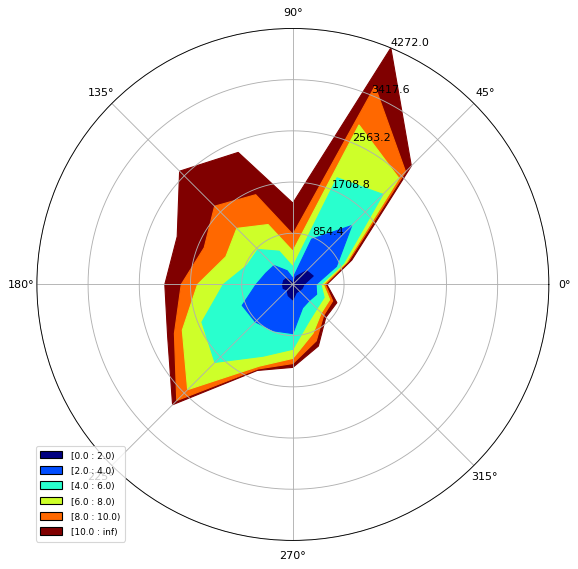

In [26]:
ax = WindroseAxes.from_ax()
ax.contourf(df_NDJF.wdir, df_NDJF.wspd, bins=np.arange(0, 12, 2), cmap=cm.jet)
ax.set_legend()

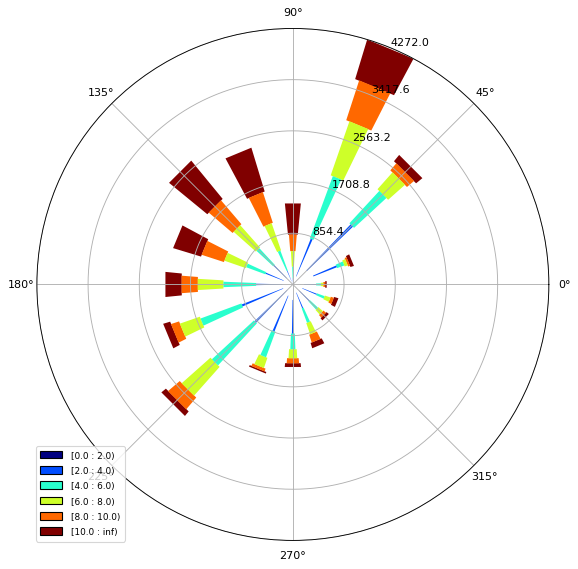

In [25]:
ax = WindroseAxes.from_ax()
ax.box(df_NDJF.wdir, df_NDJF.wspd, bins=np.arange(0, 12, 2))
ax.set_legend()

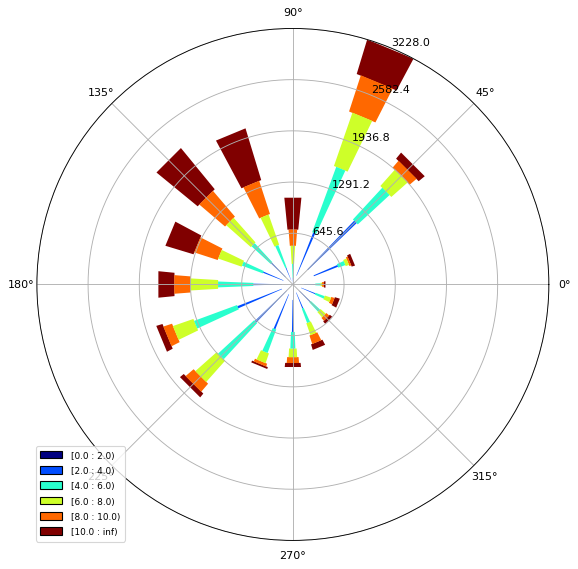

In [22]:
ax = WindroseAxes.from_ax()
ax.box(df_NDJ.wdir, df_NDJ.wspd, bins=np.arange(0, 12, 2))
ax.set_legend()

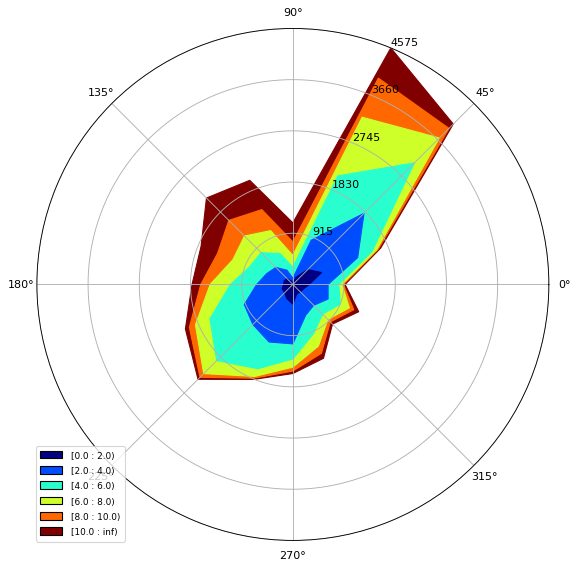

In [23]:
ax = WindroseAxes.from_ax()
ax.contourf(df_SOND.wdir, df_SOND.wspd, bins=np.arange(0, 12, 2), cmap=cm.jet)
ax.set_legend()

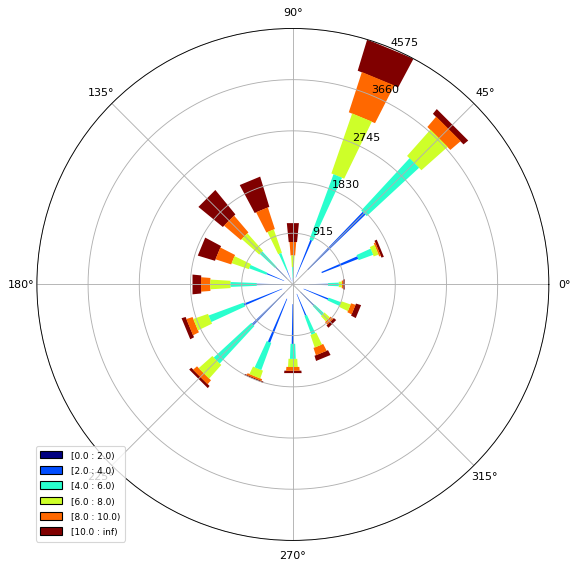

In [24]:
ax = WindroseAxes.from_ax()
ax.box(df_SOND.wdir, df_SOND.wspd, bins=np.arange(0, 12, 2))
ax.set_legend()